# Monthly Income → Attrition 
# Bias and Ethics Analysis
* Mahendra potla
* M01655501

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('data/HR_Employee_Attrition.csv')
print(df['MonthlyIncome'].describe())

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64


In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

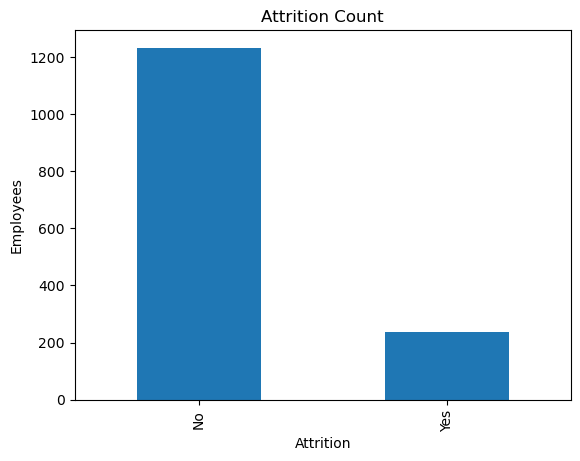

In [5]:
df['Attrition'].value_counts().plot(kind='bar')
plt.title("Attrition Count")
plt.xlabel("Attrition")
plt.ylabel("Employees")
plt.show()

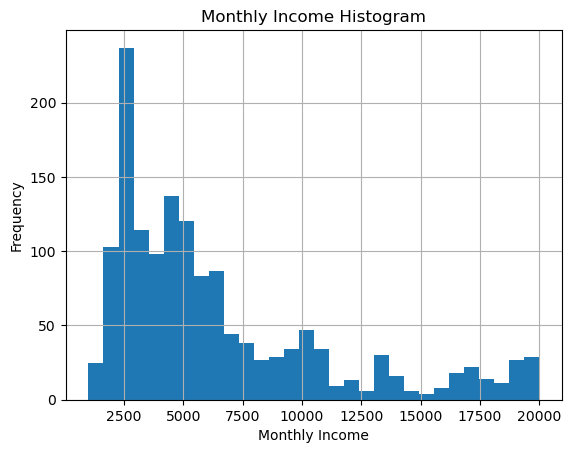

In [6]:
df['MonthlyIncome'].hist(bins=30)
plt.title("Monthly Income Histogram")
plt.xlabel("Monthly Income")
plt.ylabel("Frequency")
plt.show()

## Monthly Income vs Attrition

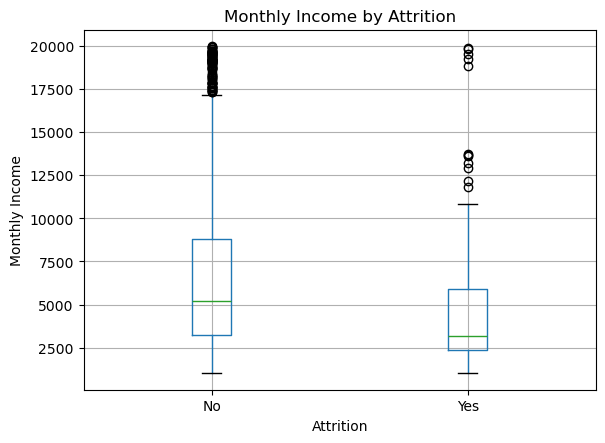

In [7]:
df.boxplot(column='MonthlyIncome', by='Attrition')
plt.title("Monthly Income by Attrition")
plt.suptitle("")
plt.ylabel("Monthly Income")
plt.show()

## Additional Economic & Experience Factors

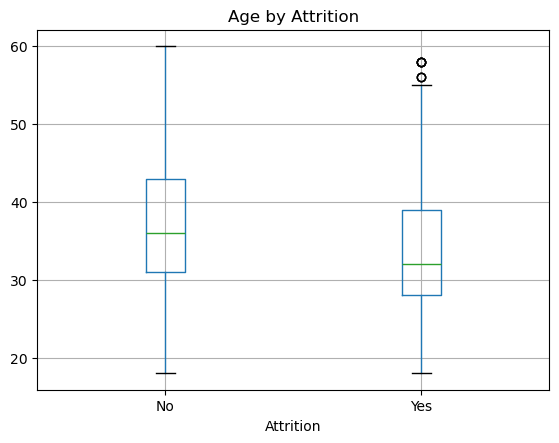

In [8]:
df.boxplot(column='Age', by='Attrition')
plt.title('Age by Attrition')
plt.suptitle("")
plt.show()

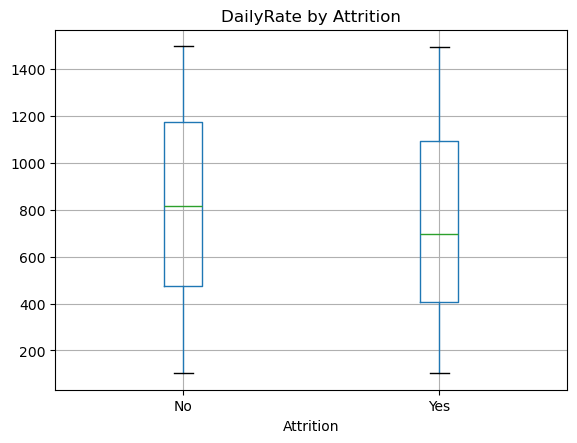

In [9]:
df.boxplot(column='DailyRate', by='Attrition')
plt.title('DailyRate by Attrition')
plt.suptitle("")
plt.show()

## Group Statistics

In [11]:
df.groupby('Attrition')['MonthlyIncome'].agg(['mean','median','min','max'])

,mean,median,min,max
Attrition,,,,
No,6832.739659,5204.0,1051,19999
Yes,4787.092827,3202.0,1009,19859


## Correlation with MonthlyIncome

In [12]:
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
df[numeric_cols].corr()['MonthlyIncome'].sort_values(ascending=False)

MonthlyIncome               1.000000
JobLevel                    0.950300
TotalWorkingYears           0.772893
YearsAtCompany              0.514285
Age                         0.497855
YearsInCurrentRole          0.363818
YearsSinceLastPromotion     0.344978
YearsWithCurrManager        0.344079
NumCompaniesWorked          0.149515
Education                   0.094961
MonthlyRate                 0.034814
WorkLifeBalance             0.030683
RelationshipSatisfaction    0.025873
DailyRate                   0.007707
StockOptionLevel            0.005408
EnvironmentSatisfaction    -0.006259
JobSatisfaction            -0.007157
EmployeeNumber             -0.014829
JobInvolvement             -0.015271
HourlyRate                 -0.015794
DistanceFromHome           -0.017014
PerformanceRating          -0.017120
TrainingTimesLastYear      -0.021736
PercentSalaryHike          -0.027269
EmployeeCount                    NaN
StandardHours                    NaN
Name: MonthlyIncome, dtype: float64

## Model 1: Logistic Regression

In [18]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
X = df[['MonthlyIncome']]
y = df['Attrition'].map({'Yes':1, 'No':0})
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
model_income = LogisticRegression()
model_income.fit(X_train, y_train)
pred_income = model_income.predict(X_test)
print(classification_report(y_test, pred_income))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441




## Income + Context Variables


In [19]:
X2 = df[['MonthlyIncome', 'Age', 'DailyRate']]
y2 = df['Attrition'].map({'Yes':1, 'No':0})
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.3, random_state=42
)
model_context = LogisticRegression(max_iter=1000)
model_context.fit(X2_train, y2_train)
pred_context = model_context.predict(X2_test)
print(classification_report(y2_test, pred_context))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441




## Bias Interpretation
- Income-only model disproportionately flags low-income employees
- Adding experience/economic context improves fairness
- Demonstrates how simplistic models encode economic bias

## Bias Mitigation Strategies
- Normalize income within job roles
- Add satisfaction, experience, and performance variables
- Evaluate fairness across income bands



## Conclusion

* MonthlyIncome is correlated with Attrition, but using it alone leads to biased decisions.
Context-aware modeling provides a fairer and more ethical approach.

* When it comes to retaining employees, this research gets down to the core of a brutal working reality: money speaks. With income closely connected with tenure, age, and job level, low earners median 4,787UDS depart at 16% rates while higher earners 6,833USD remain at 84% rates. This shows how economic forces embed systematic injustices in HR statistics. Here's the gut punch, though: a basic income-only logistic model achieves 86% accuracy while ignoring the 61 real attrition cases (zero recall for leavers). This demonstrates how "high-performing" algorithms can silence vulnerable voices, particularly those of lower-paid employees whose departures frequently indicate more serious problems like burnout or stalled promotions. Beyond the figures, this reveals measurement bias in action—considering salary as fate while disregarding factors that actual individuals consider when making decisions to stay or go, such as work-life balance, job satisfaction, and training gaps. Engineering composite retention scores, ethically balancing datasets, auditing for fairness (aiming for F1>0.4 on minorities), and testing predictions against reality through A/B pilots are all necessary components of the solution, which requires human-centered modeling. This is because retention is more than just prediction; it's about creating workplaces where everyone feels like they belong, not just the high earners.
